Please Insert File Name (without .csv): ftap-lvl0-forearm_S2_2019-12-05T09.55.32.037_C49948A1895C_Gyroscope_1.4.5
[10.086666666666687, 8.340666666666692, 11.46600000000002, 14.695333333333357, 11.689666666666689, 5.013000000000026, 5.061000000000027, 8.694333333333361, 6.204333333333359, 9.372333333333362, 5.3226666666667, 9.88333333333337, 11.021333333333372, 2.8583333333333716, 3.6536666666667026, 7.200333333333363, 12.675333333333365, 8.610666666666702, 11.03133333333337, 7.7156666666667, 11.361666666666698, 10.388666666666701, 19.169333333333366, 6.791000000000039, 10.61500000000004, 15.1046666666667, 13.869333333333365, 8.333666666666698, 11.001333333333367, 12.840333333333367, 9.568000000000035, 8.857000000000035, 3.051000000000036, 13.267666666666699, 16.9386666666667, 8.4626666666667, 12.655333333333363, 23.48300000000003, 15.243666666666696, 7.962666666666696, 7.372666666666698, 3.4276666666666955, 11.733000000000033, 14.240333333333366, 22.914000000000037, 12.637000000000036,

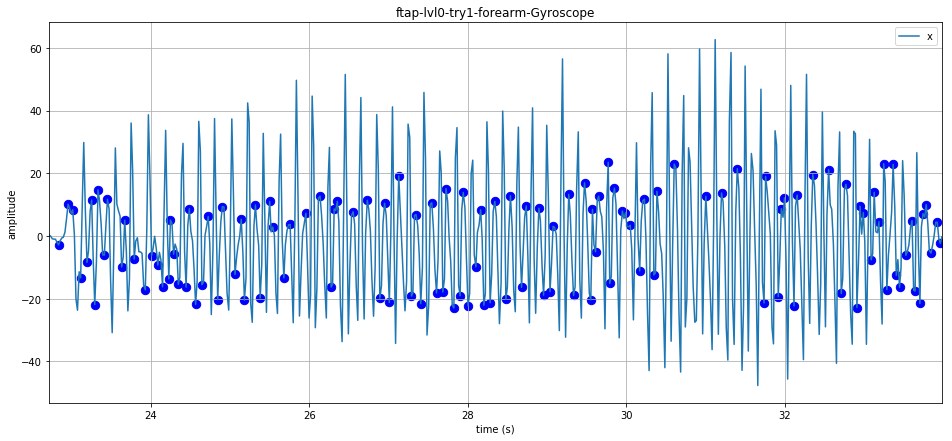

[12.395666666666664, 18.048666666666666, 8.711666666666655, 14.677333333333326, 12.51266666666666, 13.063666666666649, 10.833333333333327, 13.496333333333325, 6.061999999999992, 1.4323333333333457, 15.449666666666687, 12.314333333333355, 12.314666666666687, 7.535666666666688, 1.6586666666666883, 10.244333333333351, 1.1176666666666861, 9.024333333333347, 14.077333333333344, 17.860333333333344, 16.34600000000001, 11.63100000000001, 10.091333333333342, 12.731333333333346, 18.526333333333348, 18.466000000000008, 18.37666666666668, 12.891333333333346, 12.180000000000012, 9.507000000000016, 4.24033333333335, 17.33266666666668, 12.276333333333342, 9.324333333333339, 18.935000000000002, 16.781333333333336, 13.947999999999999, 12.685333333333334, 13.448000000000002, 15.927666666666672, 13.803333333333342, 10.002666666666677, 17.665333333333344, 10.160000000000009, 8.689333333333344, 18.651333333333348, 1.5143333333333464, 11.68666666666668, 10.948000000000013, 5.935000000000015, 5.9936666666666

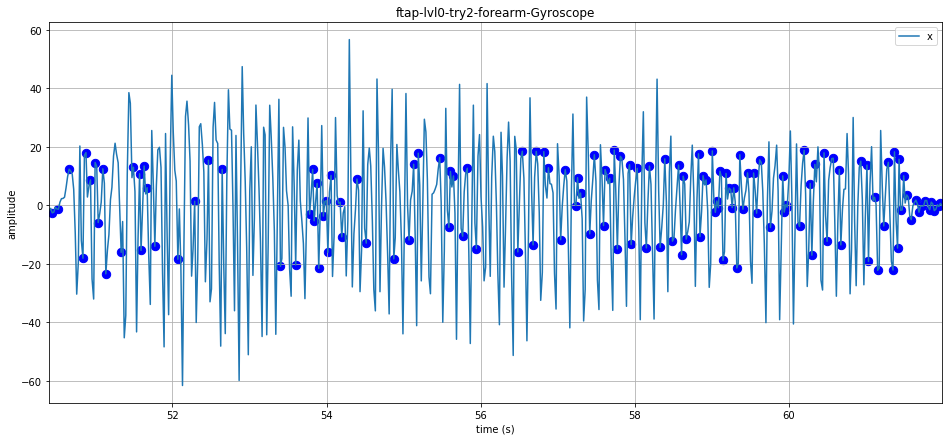

[0.06566666666655574, 13.157999999999888, 17.258666666666556, 3.305333333333232, 17.60433333333323, 16.31866666666657, 21.445999999999895, 20.7749999999999, 10.550999999999902, 6.814333333333243, 15.388666666666577, 0.14499999999990365, 12.230999999999906, 14.280999999999906, 13.541666666666568, 22.891333333333236, 23.9709999999999, 18.843999999999898, 11.003333333333234, 16.94866666666656, 15.406666666666569, 14.455999999999904, 16.760333333333236, 16.638999999999903, 13.294999999999908, 11.338999999999906, 19.334666666666575, 1.2396666666665723, 16.020999999999905, 14.96666666666657, 21.945999999999906, 19.217333333333237, 22.601666666666567, 3.9709999999999077, 9.714999999999907, 18.02099999999991, 17.873333333333242, 10.217999999999908, 9.430999999999905, 7.034999999999906, 2.5759999999999064, 8.030999999999905, 11.391999999999902, 22.487333333333233, 12.756666666666565, 15.104333333333228, 23.609999999999896, 1.3109999999998978, 10.447333333333232, 1.6719999999999011, 14.931333333

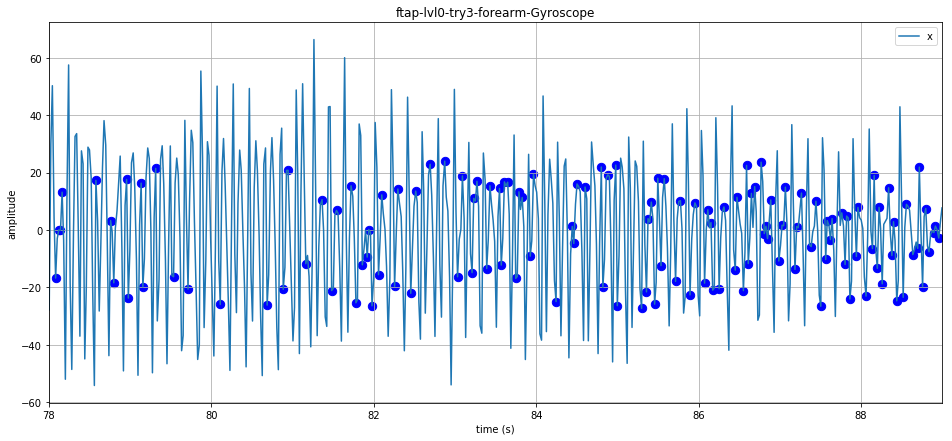

In [16]:
from os import listdir
from scipy import signal
from itertools import combinations, product
import json
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import truncation
import handle

def timestat_acc(acc_t):
    appended1, appended3 = [], []
    Lx, Ly, Lz = [], [], []
    
    for t in acc_t:
        # appending number of zero crossing
        L1 = t['x-axis (g)'].values.tolist()
        ar_x = np.array(L1)
        zcross_xa = ((ar_x[:-1] * ar_x[1:]) < 0).sum()
       
        L2 = t['y-axis (g)'].values.tolist()
        ar_y = np.array(L2)
        zcross_ya = ((ar_y[:-1] * ar_y[1:]) < 0).sum()
        
        L3 = t['z-axis (g)'].values.tolist()
        ar_z = np.array(L3)
        zcross_za = ((ar_z[:-1] * ar_z[1:]) < 0).sum()
        
        Lx.append(ar_x)
        Ly.append(ar_y)
        Lz.append(ar_z)
        appended1.append([zcross_xa, zcross_ya, zcross_za])
        appended1.append([np.mean(L1), np.mean(L2), np.mean(L3)])
        appended1.append([np.std(L1), np.std(L2), np.std(L3)])
        
        # appending number of mean crossing
        xcrossings_a, ycrossings_a, zcrossings_a = [], [], []
        for i in range(1, len(ar_x)):
            if ar_x[i-1] < np.mean(L1) and ar_x[i] >= np.mean(L1):
                xcrossings_a.append(i)
            if ar_y[i-1] < np.mean(L2) and ar_y[i] >= np.mean(L2):
                ycrossings_a.append(i)
            if ar_z[i-1] < np.mean(L3) and ar_z[i] >= np.mean(L3):
                zcrossings_a.append(i)
                
        appended1.append([len(xcrossings_a), len(ycrossings_a), len(zcrossings_a)])
    
    # calculating covariance
    for i in range(len(Lx)):
        # setting conditions to deducting corresponding mean values from the array of different tries
        Lxi = Lx[i] - appended1[4*i+1][0]
        Lyi = Ly[i] - appended1[4*i+1][1]
        Lzi = Lz[i] - appended1[4*i+1][2]

        # using combination to calculate SOP of values divided by the number of values
        for i in combinations([Lxi,Lyi,Lzi],2):
            for x,y in [i]:
                appended3.append(sum(x*y)/(len(Lxi)-1))
    
    return appended1,appended3
    
def timestat_gyr(gyro_t):
    appended2, appended4 = [], []
    L_x, L_y, L_z = [], [], []
    
    for t in gyro_t:
        L4 = t['x-axis (deg/s)'].values.tolist()
        ar_x = np.array(L4)
        zcross_xg = ((ar_x[:-1] * ar_x[1:]) < 0).sum()
        
        L5 = t['y-axis (deg/s)'].values.tolist()
        ar_y = np.array(L5)
        zcross_yg = ((ar_y[:-1] * ar_y[1:]) < 0).sum()
        
        L6 = t['z-axis (deg/s)'].values.tolist()
        ar_z = np.array(L6)
        zcross_zg = ((ar_z[:-1] * ar_z[1:]) < 0).sum()
        
        L_x.append(ar_x)
        L_y.append(ar_y)
        L_z.append(ar_z)
        appended2.append([zcross_xg, zcross_yg, zcross_zg])
        appended2.append([np.mean(L4), np.mean(L5), np.mean(L6)])
        appended2.append([np.std(L4), np.std(L5), np.std(L6)])
        
        xcrossings_g, ycrossings_g, zcrossings_g = [], [], []
        for i in range(1, len(ar_x)):
            if ar_x[i-1] < np.mean(L4) and ar_x[i] >= np.mean(L4):
                xcrossings_g.append(i)
            if ar_y[i-1] < np.mean(L5) and ar_y[i] >= np.mean(L5):
                ycrossings_g.append(i)
            if ar_z[i-1] < np.mean(L6) and ar_z[i] >= np.mean(L6):
                zcrossings_g.append(i)
                
        appended2.append([len(xcrossings_g), len(ycrossings_g), len(zcrossings_g)])
        
    for i in range(len(L_x)):
        Lxi = L_x[i] - appended2[4*i+1][0]
        Lyi = L_y[i] - appended2[4*i+1][1]
        Lzi = L_z[i] - appended2[4*i+1][2]

        for i in combinations([Lxi,Lyi,Lzi],2):
            for x,y in [i]:
                appended4.append(sum(x*y)/(len(Lxi)-1))

    return appended2,appended4
    
def cal_magnitude(df, file, window):
    # combine triaxial data into one singular magnitude data
    if 'Accelerometer' in file:
        df['x'] = df.loc[window-1:,'x-axis (g)']-df['x-axis (g)'].rolling(window).mean()[window-1:]
        df['y'] = df.loc[window-1:,'y-axis (g)']-df['y-axis (g)'].rolling(window).mean()[window-1:]
        df['z'] = df.loc[window-1:,'z-axis (g)']-df['z-axis (g)'].rolling(window).mean()[window-1:]
        df['magnitude'] = df['x']**2 + df['y']**2 + df['z']**2
        df['magnitude'] = (df['magnitude'].apply(math.sqrt))*9.81
        
    elif 'Gyroscope' in file:
        df['x'] = df.loc[window-1:,'x-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
        df['y'] = df.loc[window-1:,'y-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
        df['z'] = df.loc[window-1:,'z-axis (deg/s)']-df['x-axis (deg/s)'].rolling(window).mean()[window-1:]
        df['magnitude'] = df['x']**2 + df['y']**2 + df['z']**2
        df['magnitude'] = df['magnitude'].apply(math.sqrt)
        
    return df

# MAIN FUNCTION
def main(filepath='/', window=3, truncate=None, columns=None):
    info = []
    path = 'Motion Data/' + filepath + '.csv'
    file_name = path.split('/')[1]
    title_main = file_name.split('_')[0]

    # append user's requested metrics to the default metrics
    columns = ['test','sensor','datatype','lvl','try','duration'] + columns

    # extract dataframe
    df_main = pd.read_csv(path)

    # find moving average of triaxial data and combine them into one singular magnitude data
    df_main = cal_magnitude(df_main, file_name, window)

    acc, gyr = [], []
    for test in range(3):
        # include tries in title
        title = (title_main.split('-')[0] + '-' + title_main.split('-')[1] + 
                 '-try' + str(test+1) + '-' + title_main.split('-')[2] + 
                 '-' + file_name.split('_')[4])

        # truncate signal beyond start and end times
        if (truncate is not None) and (truncate[filepath][test] != ()):
            df = df_main.loc[(df_main['elapsed (s)'] <= truncate[filepath][test][1]) & 
                             (df_main['elapsed (s)'] >= truncate[filepath][test][0])]
            df.reset_index(inplace=True)
        else:
            df = df_main

        # find peaks and troughs in signal
        time_p, p_plot, peaks, col = handle.find_peaks(title, df, 10)
        time_t, t_plot, troughs, col = handle.find_troughs(title, df, 10)
        result_main = pd.concat([peaks, troughs], axis=0, join='outer', ignore_index=False)
        result_main = result_main.sort_values(by=['time'])
        result = result_main.reset_index(drop=True)

        # find jitter peaks and troughs in signal
        time_p_j, p_plot_j, peaks, col = handle.find_peaks(title, df, None)
        time_t_j, t_plot_j, troughs, col = handle.find_troughs(title, df, None)
        result_main = pd.concat([peaks, troughs], axis=0, join='outer', ignore_index=False)
        result_main = result_main.sort_values(by=['time'])
        result_main = result_main.reset_index(drop=True)
        result_jitters = handle.get_jitters(result_main)
        
        time_p_j = list(result_jitters[result_jitters['peaks'] > 0]['time'])
        p_plot_j = list(result_jitters[result_jitters['peaks'] > 0]['peaks'])
        time_t_j = list(result_jitters[result_jitters['peaks'] < 0]['time'])
        t_plot_j = list(result_jitters[result_jitters['peaks'] < 0]['peaks'])

        # plot altered peak and troughs with original signal
        start, end = 0, 300
        ax1=df.plot(x='elapsed (s)', y=[col], figsize=(16,7), title=title)
        result.plot.scatter(x='time', y='peaks', ax=ax1, s=140, c='r')
        result_jitters.plot.scatter(x='time', y='peaks', ax=ax1, s=70, c='b')
        ax1.grid(True)
        ax1.set_xlabel('time (s)')
        ax1.set_ylabel('amplitude')
        plt.show()

        magunit = 'm/s^2' if 'Accelerometer' in file_name else 'degrees/s'

        obj = pd.DataFrame({
            'metric_name': ['test', 'sensor', 'datatype', 'lvl', 'try', 'axis', 'duration',
                          '+ve actions', '+ve peak height', '+ve peak height std', '+ve peak width', '+ve peak width std',
                          '+ve actions_j', '+ve peak height_j', '+ve peak height_j std', '+ve peak width_j', '+ve peak width_j std',
                          '-ve actions', '-ve peak height', '-ve peak height std', '-ve peak width', '-ve peak width std',
                          '-ve actions_j', '-ve peak height_j', '-ve peak height_j std', '-ve peak width_j', '-ve peak width_j std'],
            'metric_description': ['test', 'sensor location', 'datatype', 'level of severity', 'try', 'significant axis', 'duration',
                            'number of main peaks at +ve axis', 'average height of main peaks at +ve axis', 'standard deviation of height of main peaks at +ve axis', 'average width of main peaks at +ve axis', 'standard deviation of width of main peaks at +ve axis',
                            'number of jitter peaks at +ve axis', 'average height of jitter peaks at +ve axis', 'standard deviation of height of jitter peaks at +ve axis', 'average width of jitter peaks at +ve axis', 'standard deviation of width of jitter peaks at +ve axis',
                            'number of main peaks at -ve axis', 'average height of main peaks at -ve axis', 'standard deviation of height of main peaks at -ve axis', 'average width of main peaks at -ve axis', 'standard deviation of width of main peaks at -ve axis',
                            'number of jitter peaks at -ve axis', 'average height of jitter peaks at -ve axis', 'standard deviation of height of jitter peaks at -ve axis', 'average width of jitter peaks at -ve axis', 'standard deviation of width of jitter peaks at -ve axis'],
            'author': ['JW', 'JW', 'JW', 'JW', 'JW', 'JW', 'JW',
                        'JW', 'JW', 'JW', 'JW', 'JW',
                        'JW', 'JW', 'JW', 'JW', 'JW',
                        'JW', 'JW', 'JW', 'JW', 'JW',
                        'JW', 'JW', 'JW', 'JW', 'JW'],
            'value': [title_main.split('-')[0], title_main.split('-')[2], file_name.split('_')[4], int(title_main.split('-')[1][-1]), test+1, col, df.loc[len(df)-1,'elapsed (s)']-df.loc[0,'elapsed (s)'],
                       len(time_p), np.mean(p_plot), np.std(p_plot), np.mean(np.diff(time_p)), np.std(np.diff(time_p)),
                       len(time_p_j), np.mean(p_plot_j), np.std(p_plot_j), np.mean(np.diff(time_p_j)), np.std(np.diff(time_p_j)),
                       len(time_t), np.mean(t_plot), np.std(t_plot), np.mean(np.diff(time_t)), np.std(np.diff(time_t)),
                       len(time_t_j), np.mean(t_plot_j), np.std(t_plot_j), np.mean(np.diff(time_t_j)), np.std(np.diff(time_t_j))],
            'units': ['-', '-', '-', '-', '-', '-', 's',
                      '-', magunit, '-', 's', '-',
                      '-', magunit, '-', 's', '-',
                      '-', magunit, '-', 's', '-',
                      '-', magunit, '-', 's', '-'],
        })

        info.append(obj[obj['metric_name'].isin(columns)])

        # for zero crossing rate, mean crossing rate and covariance
        if 'Accelerometer' in file_name: acc.append(df)
        else:                            gyr.append(df)

    # for zero crossing rate, mean crossing rate and covariance
    if 'Accelerometer' in file_name: appended,cov = timestat_acc(acc)
    else:                            appended,cov = timestat_gyr(gyr)

    # append zero crossing rate, mean crossing rate and covariance data
    for i in range(3):
        obj2 = pd.DataFrame({
            'metric_name': ['zcr-x', 'zcr-y', 'zcr-z',
                          'mcr-x', 'mcr-y', 'mcr-z',
                          'xy', 'xz', 'yz'],
            'metric_description': ['zero crossing rate - x', 'zero crossing rate - y', 'zero crossing rate - z',
                            'mean crossing rate - x', 'mean crossing rate - y', 'mean crossing rate - z',
                            'xy covariance', 'xz covariance', 'yz covariance'],
            'author': ['CY', 'CY', 'CY',
                        'CY', 'CY', 'CY',
                        'CY', 'CY', 'CY'],
            'value': [appended[i*4][0], appended[i*4][1], appended[i*4][2],
                       appended[i*4+3][0], appended[i*4+3][1], appended[i*4+3][2],
                       cov[i*3+0], cov[i*3+1], cov[i*3+2]],
            'units': ['-', '-', '-',
                      '-', '-', '-',
                      '-', '-', '-'],
        })
        
        # append stats into dataframe if it is requested
        info[i] = info[i].append(obj2[obj2['metric_name'].isin(columns)])
        
        # convert dataframe into json format
        info[i] = eval(info[i].to_json(orient='records'))

    return info

cols = ['+ve actions_j', '+ve peak height_j', '+ve peak height_j std', '+ve peak width_j', '+ve peak width_j std','xy']

info = main(filepath=input('Please Insert File Name (without .csv): '), truncate=truncation.values, columns=cols)
# print(json.dumps(info, indent=4))